# Decision Tree  

## 1. Apa itu Decision Tree?  

**Decision Tree (Pohon Keputusan)** adalah algoritma supervised learning yang digunakan untuk klasifikasi dan regresi. Algoritma ini membagi dataset ke dalam subset berdasarkan fitur, dengan tujuan memaksimalkan pemisahan antar kelas secara logis.  

---

## 2. Entropy  

Entropy mengukur tingkat ketidakpastian atau impurity dalam sebuah dataset. Semakin murni (homogen) data, semakin rendah entropy-nya.  

### Rumus Entropy:  
$$
Entropy(S) = - \sum_{i=1}^{n} p_i \cdot \log_2(p_i)
$$  

Di mana:  
- $p_i$ adalah proporsi dari kelas ke-i dalam subset $S$.  
- $n$ adalah jumlah total kelas.  

### Contoh:  

Jika dalam satu subset terdapat:  
- 4 data kelas A.  
- 4 data kelas B.  

Maka:  
$$
Entropy = -\left( \frac{4}{8} \cdot \log_2\left(\frac{4}{8}\right) + \frac{4}{8} \cdot \log_2\left(\frac{4}{8}\right) \right) = 1
$$

Jika semua data dalam satu kelas:  
- 8 data kelas A.  

Maka:  
$$
Entropy = -\left( 1 \cdot \log_2(1) \right) = 0
$$  

---

## 3. Information Gain (IG)  

Information Gain digunakan untuk memilih fitur terbaik yang digunakan sebagai node dalam pohon keputusan.  

### Rumus Information Gain:   
$$
Information\ Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \cdot Entropy(S_v)
$$  

Keterangan:
- $S$ = keseluruhan dataset (parent)
- $A$ = atribut (fitur) yang diuji
- $Values(A)$ = semua nilai unik dari atribut $A$
- $S_v$ = subset dari $S$ yang memiliki nilai $v$ pada atribut $A$
- $Entropy(S)$ = entropy dari dataset sebelum split
- $Entropy(S_v)$ = entropy dari subset setelah split
- $|S|$ = jumlah total data
- $|S_v|$ = jumlah data pada subset $S_v$ 

---

## 4. Cara Kerja Decision Tree  

1. Hitung **entropy** awal dari dataset.  
2. Untuk setiap fitur, bagi data berdasarkan nilai threshold tertentu.  
3. Hitung **entropy** dari masing-masing subset.  
4. Hitung **average entropy** dari subset tersebut.  
5. Hitung **information gain** = entropy awal - entropy rata-rata.  
6. Pilih fitur dengan **information gain tertinggi** sebagai node (akar atau cabang).  
7. Ulangi proses ini secara rekursif hingga:  
   - Data habis dibagi sempurna, atau  
   - Tidak ada lagi information gain yang signifikan, atau  
   - Tercapai depth maksimum pohon.  


---


## 5. Kelebihan Decision Tree  
- Mudah dipahami dan divisualisasikan.  
- Tidak memerlukan normalisasi data.  
- Dapat menangani data numerik dan kategorikal.  


---


## 6. Kekurangan Decision Tree  
- Rentan terhadap overfitting.  
- Sensitif terhadap data yang tidak seimbang.  
- Bisa tidak stabil (perubahan kecil di data bisa mengubah struktur pohon).  

## **Tugas Decision Tree**

### Perhitungan Manual Menggunakan Information Gain untuk Klasifikasi dengan Jumlah Data 15 dengan 2 Fitur 3 Kelas  

- https://docs.google.com/spreadsheets/d/1qKp4-_3ZeC9pM5CTrOsfRcAMOVKEeeD6KPk535Tv1_w/edit?usp=sharing

### Perbandingan Hasil dengan Menggunakan Library Sklearn DecisionTreeClassifier

In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Data dari Excel
data = {
    'Sepal Length': [4.3, 5.8, 5.7, 5.4, 5.1, 5.6, 5.8, 6.2, 5.6, 5.9,
                     4.9, 7.3, 6.7, 7.2, 6.5],
    'Sepal Width': [3.0, 4.0, 4.4, 3.9, 3.5, 3.0, 2.7, 2.2, 2.5, 3.2,
                    2.5, 2.9, 2.5, 3.6, 3.2],
    'Class': [
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica'
    ]
}

df = pd.DataFrame(data)

# Encode label kelas
le = LabelEncoder()
df['ClassEncoded'] = le.fit_transform(df['Class'])

# Threshold dari Excel
thresholds = {'Sepal Length': 5.45, 'Sepal Width': 3.0}

# Ubah fitur jadi biner berdasarkan threshold
for feature, threshold in thresholds.items():
    df[f'{feature}_binary'] = (df[feature] > threshold).astype(int)

# Analisis tiap fitur
results = {}

for feature, threshold in thresholds.items():
    X = df[[f'{feature}_binary']]
    y = df['ClassEncoded']
    
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)
    clf.fit(X, y)

    tree = clf.tree_
    n_total = tree.n_node_samples[0]
    left_count = tree.n_node_samples[1]
    right_count = tree.n_node_samples[2]

    e_root = tree.impurity[0]
    e_left = tree.impurity[1]
    e_right = tree.impurity[2]
    
    avg_entropy = (left_count / n_total) * e_left + (right_count / n_total) * e_right
    info_gain = e_root - avg_entropy

    results[feature] = {
        'Threshold': threshold,
        'Entropy Awal': round(e_root, 2),
        'Entropy Kiri': round(e_left, 2),
        'Entropy Kanan': round(e_right, 2),
        'Entropy Rata2': round(avg_entropy, 2),
        'Information Gain': round(info_gain, 2)
    }

# Cetak hasil
print("=== Hasil Information Gain dengan sklearn (threshold tetap) ===\n")
best_feature = None
best_ig = -1

for feature, vals in results.items():
    print(f"Fitur: {feature} (Threshold = {vals['Threshold']})")
    print(f"  Entropy Awal     : {vals['Entropy Awal']}")
    print(f"  Entropy Kiri     : {vals['Entropy Kiri']}")
    print(f"  Entropy Kanan    : {vals['Entropy Kanan']}")
    print(f"  Entropy Rata2    : {vals['Entropy Rata2']}")
    print(f"  Information Gain : {vals['Information Gain']}\n")

    # Cek fitur dengan IG tertinggi
    if vals['Information Gain'] > best_ig:
        best_ig = vals['Information Gain']
        best_feature = feature

# Tampilkan fitur terbaik
print(f"Fitur terbaik berdasarkan Information Gain tertinggi adalah: **{best_feature}** (IG = {best_ig})")


=== Hasil Information Gain dengan sklearn (threshold tetap) ===

Fitur: Sepal Length (Threshold = 5.45)
  Entropy Awal     : 1.58
  Entropy Kiri     : 0.81
  Entropy Kanan    : 1.49
  Entropy Rata2    : 1.31
  Information Gain : 0.27

Fitur: Sepal Width (Threshold = 3.0)
  Entropy Awal     : 1.58
  Entropy Kiri     : 1.41
  Entropy Kanan    : 1.38
  Entropy Rata2    : 1.39
  Information Gain : 0.19

Fitur terbaik berdasarkan Information Gain tertinggi adalah: **Sepal Length** (IG = 0.27)


### Membuat Pohon Keputusan dengan Rulenya dan Diuji dengan 2 Data Baru  

Data Baru:  
Data 1:  
- Sepal Length = 6.0
- Sepal Width  = 2.8  

Data 2:  
- Sepal Length = 4.9
- Sepal Width  = 3.5

=== Aturan dari Decision Tree ===

|--- Sepal Length_bin <= 0.50
|   |--- Sepal Width_bin <= 0.50
|   |   |--- class: 0
|   |--- Sepal Width_bin >  0.50
|   |   |--- class: 0
|--- Sepal Length_bin >  0.50
|   |--- Sepal Width_bin <= 0.50
|   |   |--- class: 1
|   |--- Sepal Width_bin >  0.50
|   |   |--- class: 0


=== Hasil Prediksi 2 Data Baru ===

Data ke-1:
  Sepal Length = 6.0
  Sepal Width  = 2.8
  Prediksi Kelas: Iris-versicolor

Data ke-2:
  Sepal Length = 4.9
  Sepal Width  = 3.5
  Prediksi Kelas: Iris-setosa



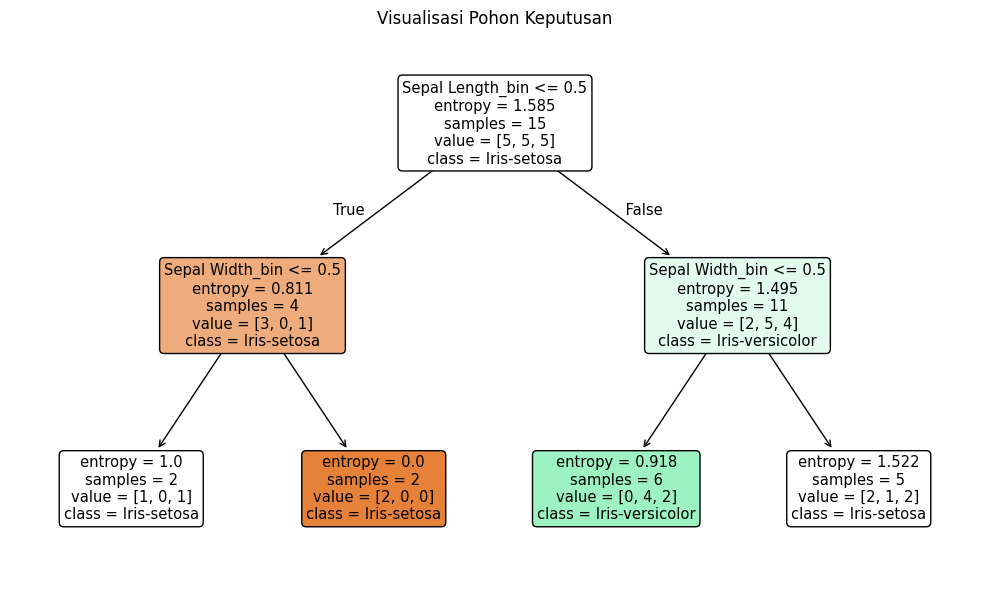

In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Dataset
data = {
    'Sepal Length': [4.3, 5.8, 5.7, 5.4, 5.1, 5.6, 5.8, 6.2, 5.6, 5.9,
                     4.9, 7.3, 6.7, 7.2, 6.5],
    'Sepal Width': [3.0, 4.0, 4.4, 3.9, 3.5, 3.0, 2.7, 2.2, 2.5, 3.2,
                    2.5, 2.9, 2.5, 3.6, 3.2],
    'Class': [
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica'
    ]
}
df = pd.DataFrame(data)

# 2. Encode class
le = LabelEncoder()
df['ClassEncoded'] = le.fit_transform(df['Class'])

# 3. Manual threshold binarisasi (mengikuti Excel)
df['Sepal Length_bin'] = (df['Sepal Length'] > 5.45).astype(int)
df['Sepal Width_bin']  = (df['Sepal Width'] > 3.0).astype(int)

# 4. Training
X = df[['Sepal Length_bin', 'Sepal Width_bin']]
y = df['ClassEncoded']

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
clf.fit(X, y)

# 5. Aturan Pohon
print("=== Aturan dari Decision Tree ===\n")
rules = export_text(clf, feature_names=['Sepal Length_bin', 'Sepal Width_bin'])
print(rules)

# 6. Prediksi Data Baru
new_data = pd.DataFrame({
    'Sepal Length': [6.0, 4.9],
    'Sepal Width': [2.8, 3.5]
})
new_data['Sepal Length_bin'] = (new_data['Sepal Length'] > 5.45).astype(int)
new_data['Sepal Width_bin']  = (new_data['Sepal Width'] > 3.0).astype(int)

pred_encoded = clf.predict(new_data[['Sepal Length_bin', 'Sepal Width_bin']])
pred_labels = le.inverse_transform(pred_encoded)

print("\n=== Hasil Prediksi 2 Data Baru ===\n")
for i, label in enumerate(pred_labels):
    print(f"Data ke-{i+1}:")
    print(f"  Sepal Length = {new_data.iloc[i]['Sepal Length']}")
    print(f"  Sepal Width  = {new_data.iloc[i]['Sepal Width']}")
    print(f"  Prediksi Kelas: {label}\n")

# 7. Visualisasi Pohon
plt.figure(figsize=(10, 6))
plot_tree(clf,
          feature_names=['Sepal Length_bin', 'Sepal Width_bin'],
          class_names=le.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Pohon Keputusan")
plt.tight_layout()
plt.show()
